In [51]:
import jlam.nbdev as nbdev
nbdev.parse_nb('04_Linear_Algebra.ipynb','linear_algebra.py')

##### [dot product: khan academy](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/vector-dot-product-and-vector-length)
##### [linear transformation](https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=3)

- what are vectors?
    - they are objects that can be added together to form new vectors
    - can be multiplied by scalars to from new vectors
- why are vectors important?
    - vectors are useful way to represent numeric data
    - [height, weight, age]

[1,2] + [2,1]= 1+2, 2+1 = [3,3]
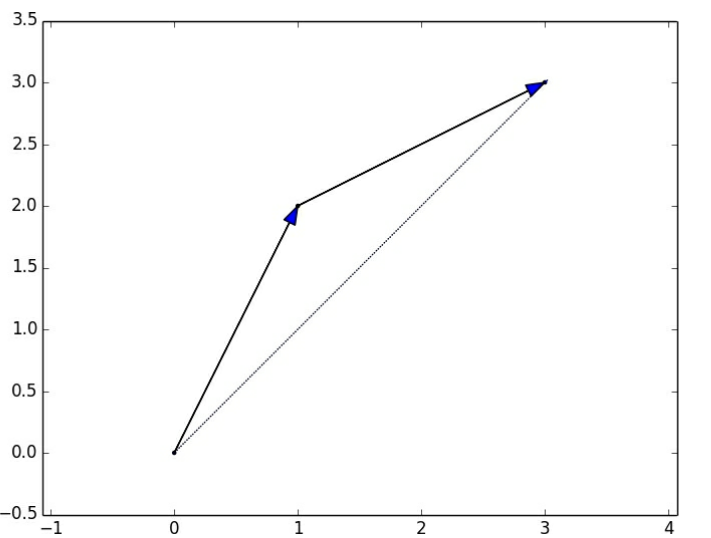

In [22]:
#<<export>>
from typing import List, Tuple, Callable
import math

Vector = List[float]
Matrix = List[List[float]] # inner list represents a row of the matrix



In [3]:
height_weight_age = [70, #inches,
                    170, #pounds,
                    40 ] #years

In [4]:
v1 = [3,4]
v2 = [1,2]

In [5]:
def vector_add(v1: Vector, v2: Vector) -> Vector:
    """Adding vectors"""
    assert len(v1)==len(v2),"vectors must be the same length"
    
    return [x+y for x,y in zip(v1,v2)]

assert vector_add([1,2],[2,1])==[3,3]

In [6]:
def vector_subtract(v1: Vector, v2: Vector) -> Vector:
    """Substract vectors"""
    assert len(v1)==len(v2),"vectors must be the same length"
    
    return [x - y for x,y in zip(v1,v2)]

assert vector_subtract([3,4],[1,2])==[2,2]

In [7]:
def check_vectors_size(v_list:Vector) -> bool:
    """check if the length of all vectors are the same"""
    assert v_list,'v_list is required'
    
    size=len(v_list[0])
    return all(len(n)==size for n in v_list)

assert check_vectors_size([[1,2,3],[1,2,4],[3,3,3]]), "vectors have different length"

In [8]:
# v_list = [[1,2,3],[1,2,4],[3,3,3]]
# size=len(v_list[0])
# sum_lst=[]
# for n in range(size):
#     s = 0
#     for v in v_list:
#         s += v[n]
#     sum_lst.append(s)

# print(sum_lst)

In [9]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """ add vectors in list"""
    assert vectors,'vectors is required'
    
    assert check_vectors_size(vectors),'all vector size must be the same'
    
    size=len(vectors[0])
    return [sum(v[n] for v in vectors)# sum all the elements with the same index (inner loop)
        for n in range(size)] # loop through each index (outer loop)

assert vector_sum([[1,2,3],[1,2,4],[3,3,3]])==[5,7,10]

In [10]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """ multiply every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1,2,3])==[2,4,6]

In [11]:
def vector_mean(vectors: List[Vector]) -> float:
    """ computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n,vector_sum(vectors))

assert vector_mean([[1,2],[3,4]])==[2,3]

In [12]:
 def dot(v: Vector, w: Vector) -> float:
    """ sum of their componentwise products """
    assert len(v)==len(w)
    
    return sum(v_i * w_i  for v_i, w_i in zip(v,w))

assert dot([2,2],[3,3])==12.0

In [13]:
def sum_of_squares(v: Vector) -> float:
    """ Return v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([2,3])==2*2+3*3==13

In [14]:
def magnitude(v: Vector) -> float:
    """ Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))

assert magnitude([3,4]) == 5

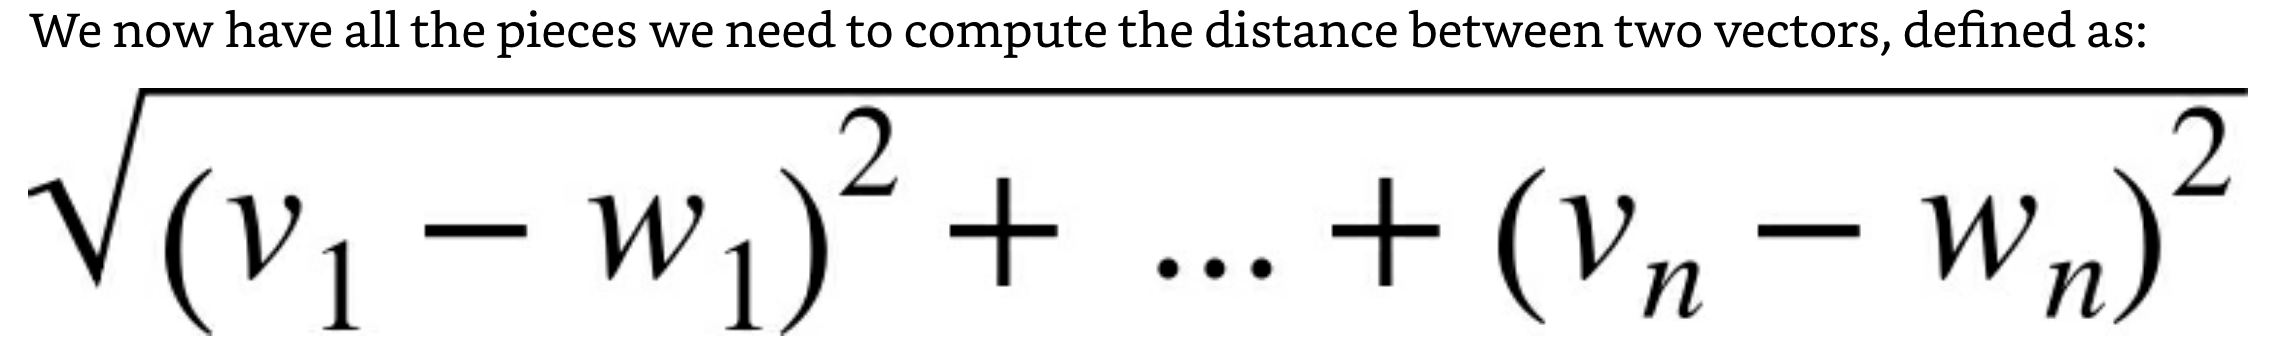

In [15]:
def distance(v: Vector, w: Vector) -> float:
    """ returns distance between 2 vectors """
    return magnitude(vector_subtract(v, w))

print(distance([3,4],[2,3]))
print(math.sqrt((3-2)^2 + (4-3)^2))

1.4142135623730951
0.0


### Matrix

In [16]:

A = [[2,3],[3,5],[6,7]]
len(A),len(A[0])

(3, 2)

In [17]:
def shape(A: Matrix) -> Tuple[int,int]:
    """Returns (# of rows of A, # of columns of A)"""
    rows = len(A)
    cols = len(A[0]) if A[0] else 0
    return (rows,cols)

A = [[2,3],[3,5],[6,7]]
assert shape(A)==(3,2)

In [18]:
shape(A)

(3, 2)

In [19]:
def get_row(A: Matrix, i: int) -> Vector:
    """Returns the i-th row of A (as a Vector)"""
    return A[i]

In [20]:
def get_column(A: Matrix, j: int) -> Vector:
    """Returns the j-th column of A (as a Vector)"""
    return [A_i[j] # get the element from j
               for A_i in A] #for each row in A

In [21]:
A = [[3,4,5],[2,3,4]]
get_column(A,1)

[4, 3]

In [26]:
def make_matrix(num_rows: int,
               num_cols: int,
               entry_fn: Callable[[int, int], float]) -> Matrix:
    """
        Returns a num_rows x num_cols matrix
        whose (i,j)-th entry is entry_fn(i,j)
    """
    return [
        [
            entry_fn(i,j)
                for j in range(num_cols) 
        ]
        for i in range(num_rows)
    ]

In [24]:
def identity_matrix(n: int) -> Matrix:
    """Returns the n x n identity matrix"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

In [27]:
identity_matrix(3)

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

In [28]:
import numpy as np

In [43]:
friends_matrix=make_matrix(10,10, lambda i, j: np.random.randint(0,2))

In [44]:
friends_matrix

[[1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 1, 0, 0, 0, 1, 0, 1],
 [0, 0, 1, 1, 1, 1, 1, 0, 1, 1],
 [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 [1, 0, 1, 0, 1, 1, 1, 0, 1, 1],
 [1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
 [0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 1]]

In [49]:
def get_friends(friends_matrix,row):
    return [i
            for i,is_friend in enumerate(friends_matrix[row])
               if is_friend]

In [50]:
get_friends(friends_matrix,0)

[0, 3, 5, 7, 8]